In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import networkx as nx
import matplotlib.colors as mcolors
import warnings
warnings.filterwarnings('ignore')

In [2]:
def load_data(file_path, sep='\t', header_names=None):
    """
    Load the dataset from a TSV file.
    
    :param file_path (str): The path to the .tsv file containing the data.
    
    :return pandas.DataFrame: The loaded dataset.
    """
    data = pd.read_table(file_path, sep=sep, names=header_names, encoding='latin-1')
    return data

### User Data

In [3]:
user_data_columns = ['user_id', 'item_id', 'rating', 'timestamp']

In [4]:
user_data = load_data('../data/raw/ml-100k/u.data', header_names=user_data_columns)
user_data.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


### User Item

In [5]:
u_item_columns = ['movie_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film_Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci_Fi', 'Thriller', 'War', 'Western']

In [6]:
u_item = load_data('../data/raw/ml-100k/u.item', sep='|', header_names=u_item_columns)
u_item.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### User Info

In [7]:
u_user_columns = ['user_id', 'age', 'gender', 'occupation', 'zip_code']

In [8]:
u_user = load_data('../data/raw/ml-100k/u.user', sep='|', header_names=u_user_columns)
u_user.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


### Combined User Data

In [9]:
all_data = (pd.merge(user_data, u_item, left_on='item_id', right_on='movie_id')).merge(u_user)

In [10]:
all_data.describe()

,user_id,item_id,rating,timestamp,movie_id,video_release_date,unknown,Action,Adventure,Animation,...,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western,age
count,100000.00000,100000.000000,100000.000000,1.000000e+05,100000.000000,0.0,100000.0000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,100000.000000
mean,462.48475,425.530130,3.529860,8.835289e+08,425.530130,NaN,0.0001,0.255890,0.137530,0.036050,...,0.017330,0.053170,0.049540,0.052450,0.194610,0.12730,0.21872,0.093980,0.018540,32.969850
std,266.61442,330.798356,1.125674,5.343856e+06,330.798356,NaN,0.0100,0.436362,0.344408,0.186416,...,0.130498,0.224373,0.216994,0.222934,0.395902,0.33331,0.41338,0.291802,0.134894,11.562623
min,1.00000,1.000000,1.000000,8.747247e+08,1.000000,NaN,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,7.000000
25%,254.00000,175.000000,3.000000,8.794487e+08,175.000000,NaN,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,24.000000
50%,447.00000,322.000000,4.000000,8.828269e+08,322.000000,NaN,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,30.000000
75%,682.00000,631.000000,4.000000,8.882600e+08,631.000000,NaN,0.0000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,40.000000
max,943.00000,1682.000000,5.000000,8.932866e+08,1682.000000,NaN,1.0000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,73.000000


In [11]:
all_data.sort_values(by=['user_id'], inplace=True)

In [12]:
all_data.drop('video_release_date', axis=1, inplace=True)

### Save Data

In [13]:
all_data.to_csv('../data/interim/all_data.csv', index=False)

In [14]:
all_data.head()

,user_id,item_id,rating,timestamp,movie_id,movie_title,release_date,IMDb_URL,unknown,Action,...,Mystery,Romance,Sci_Fi,Thriller,War,Western,age,gender,occupation,zip_code
1722,1,124,5,875071484,124,Lone Star (1996),21-Jun-1996,http://us.imdb.com/M/title-exact?Lone%20Star%2...,0,0,...,1,0,0,0,0,0,24,M,technician,85711
1643,1,161,4,875072303,161,Top Gun (1986),01-Jan-1986,http://us.imdb.com/M/title-exact?Top%20Gun%20(...,0,1,...,0,1,0,0,0,0,24,M,technician,85711
1642,1,147,3,875240993,147,"Long Kiss Goodnight, The (1996)",05-Oct-1996,http://us.imdb.com/M/title-exact?Long%20Kiss%2...,0,1,...,0,0,0,1,0,0,24,M,technician,85711
1641,1,49,3,878542478,49,I.Q. (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?I.Q.%20(1994),0,0,...,0,1,0,0,0,0,24,M,technician,85711
1640,1,128,4,875072573,128,Supercop (1992),26-Jul-1996,http://us.imdb.com/M/title-exact?Police%20Stor...,0,1,...,0,0,0,1,0,0,24,M,technician,85711


In [15]:
data_for_analitic_genre = load_data('../data/raw/ml-100k/u.genre', sep='|', header_names=['genre', 'count'])

In [16]:
data_for_analitic_genre.head()

,genre,count
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4


### Data Analysis and Visualization

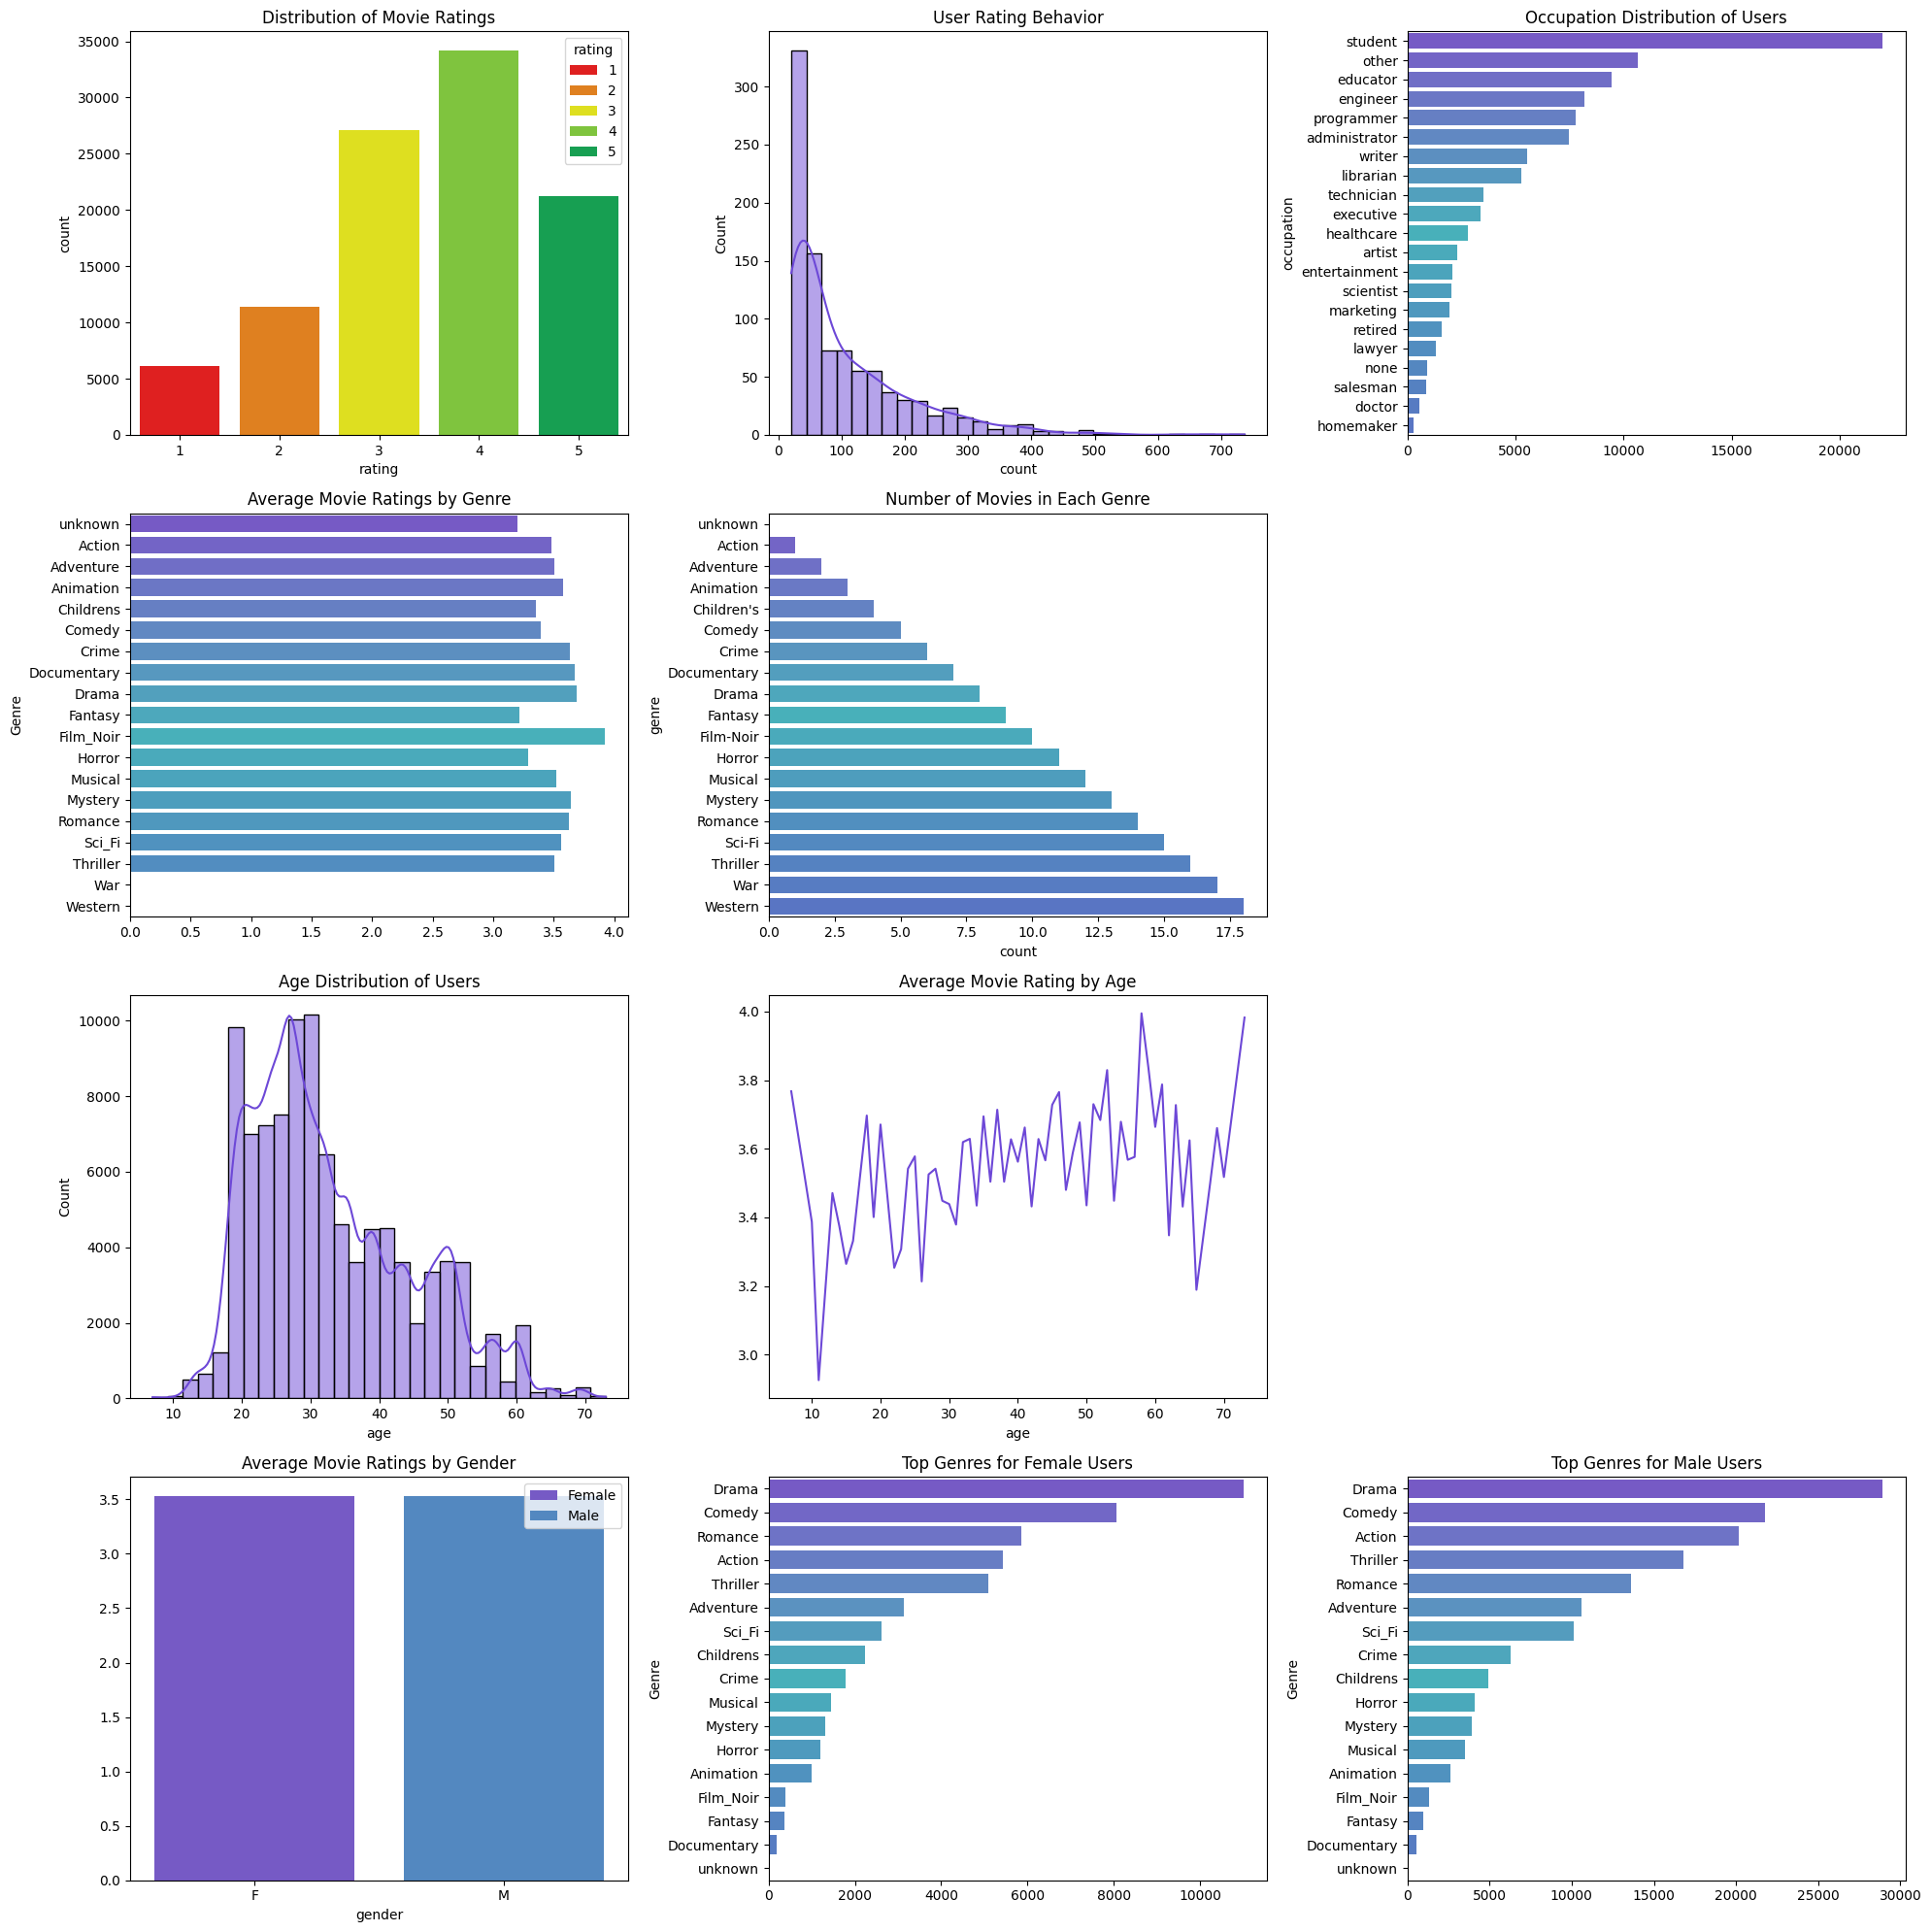

In [43]:
data = pd.read_csv('../data/interim/all_data.csv', low_memory=False)

# Setting up the grid for the multi-panel plot
plt.figure(figsize=(20, 20))
gs = gridspec.GridSpec(4, 3, width_ratios=[1, 1, 1], height_ratios=[1, 1, 1, 1])

# Distribution of movie ratings
ax0 = plt.subplot(gs[0, 0])
sns.countplot(data=data, x='rating', ax=ax0, 
              palette=sns.blend_palette(["#FF0000", "#FFFF00", '#00B64F'], n_colors=5), hue='rating')
ax0.set_title('Distribution of Movie Ratings')



# Count the number of ratings by each user
user_rating_count = data['user_id'].value_counts()

# User rating behavior
ax1 = plt.subplot(gs[0, 1])
sns.histplot(user_rating_count, bins=30, kde=True, ax=ax1, 
             color='#6D48D7')
ax1.set_title('User Rating Behavior')



occupation_count = data['occupation'].value_counts()
# Occupation distribution of users
ax7 = plt.subplot(gs[0, 2]) 
sns.barplot(x=occupation_count.values, y=occupation_count.index, ax=ax7,
             palette=sns.blend_palette(["#6D48D7", "#35C0CD", '#476DD5'], n_colors=len(occupation_count)), hue=occupation_count.index)
ax7.set_title('Occupation Distribution of Users')



# List of genre columns
genre_columns = data.columns[7:25]

# Melt the dataset to create a long format DataFrame for genres
melted_genres = data.melt(id_vars=['movie_id', 'rating'], value_vars=genre_columns, var_name='Genre', value_name='Present')
melted_genres = melted_genres[melted_genres['Present'] == 1]

# Calculate the average rating for each genre
avg_rating_by_genre = melted_genres.groupby('Genre')['rating'].mean()

if 'War' not in avg_rating_by_genre.index:
    avg_rating_by_genre['War'] = 0
if 'Western' not in avg_rating_by_genre.index:
    avg_rating_by_genre['Western'] = 0

# Sort the average ratings by genre by alfabetic order
unknown_genre = avg_rating_by_genre[avg_rating_by_genre.index == 'unknown']
sorted_genres = avg_rating_by_genre[avg_rating_by_genre.index != 'unknown'].sort_index()
avg_rating_by_genre_sorted = pd.concat([unknown_genre, sorted_genres])

# Average movie ratings by genre
ax2 = plt.subplot(gs[3])
sns.barplot(x=avg_rating_by_genre_sorted.values, y=avg_rating_by_genre_sorted.index, ax=ax2, 
            palette=sns.blend_palette(["#6D48D7", "#35C0CD", '#476DD5'], n_colors=len(avg_rating_by_genre_sorted) + 2), hue=avg_rating_by_genre_sorted.index)
ax2.set_title('Average Movie Ratings by Genre')




# Number of movies in each genre
ax3 = plt.subplot(gs[4])
sns.barplot(x=data_for_analitic_genre['count'], y=data_for_analitic_genre['genre'], ax=ax3, 
            palette=sns.blend_palette(["#6D48D7", "#35C0CD", '#476DD5'], n_colors=len(data_for_analitic_genre)), hue=data_for_analitic_genre['genre'])
ax3.set_title('Number of Movies in Each Genre')




# Age distribution of users
ax4 = plt.subplot(gs[6])
sns.histplot(data=data, x='age', bins=30, kde=True, ax=ax4,
             color='#6D48D7')
ax4.set_title('Age Distribution of Users')




# Calculate the average rating for each age
avg_rating_by_age = data.groupby('age')['rating'].mean()

# Average movie rating by age
ax5 = plt.subplot(gs[7])
sns.lineplot(x=avg_rating_by_age.index, y=avg_rating_by_age.values, ax=ax5,
             color='#6D48D7')
ax5.set_title('Average Movie Rating by Age')




# Calculate the average rating for each gender
avg_rating_by_gender = data.groupby('gender')['rating'].mean()

# Average movie ratings by gender
ax6 = plt.subplot(gs[3, 0])
sns.barplot(x=avg_rating_by_gender.index, y=avg_rating_by_gender.values, ax=ax6, 
            palette=['#6D48D7', '#4188D2'], hue=['Female', 'Male'])
ax6.set_title('Average Movie Ratings by Gender')




# Filter data for female and male users
female_data = data[data['gender'] == 'F']
male_data = data[data['gender'] == 'M']

# Melt and group by genre for female users
melted_female_genres = female_data.melt(id_vars=['movie_id', 'rating'], value_vars=genre_columns, var_name='Genre', value_name='Present')
melted_female_genres = melted_female_genres[melted_female_genres['Present'] == 1]
count_by_genre_female = melted_female_genres[melted_female_genres['Present'] == 1]['Genre'].value_counts()

# Melt and group by genre for male users
melted_male_genres = male_data.melt(id_vars=['movie_id', 'rating'], value_vars=genre_columns, var_name='Genre', value_name='Present')
melted_male_genres = melted_male_genres[melted_male_genres['Present'] == 1]
count_by_genre_male = melted_male_genres[melted_male_genres['Present'] == 1]['Genre'].value_counts()


ax8 = plt.subplot(gs[3, 1])
sns.barplot(x=count_by_genre_female.values, y=count_by_genre_female.index, ax=ax8,
             palette=sns.blend_palette(["#6D48D7", "#35C0CD", '#476DD5'], n_colors=len(count_by_genre_female)), hue=count_by_genre_female.index)
ax8.set_title('Top Genres for Female Users')



# Top Genres for Male Users
ax9 = plt.subplot(gs[3, 2])
sns.barplot(x=count_by_genre_male.values, y=count_by_genre_male.index, ax=ax9, 
            palette=sns.blend_palette(["#6D48D7", "#35C0CD", '#476DD5'], n_colors=len(count_by_genre_male)), hue=count_by_genre_male.index)
ax9.set_title('Top Genres for Male Users')



# Adjusting layout
plt.tight_layout()
plt.show()

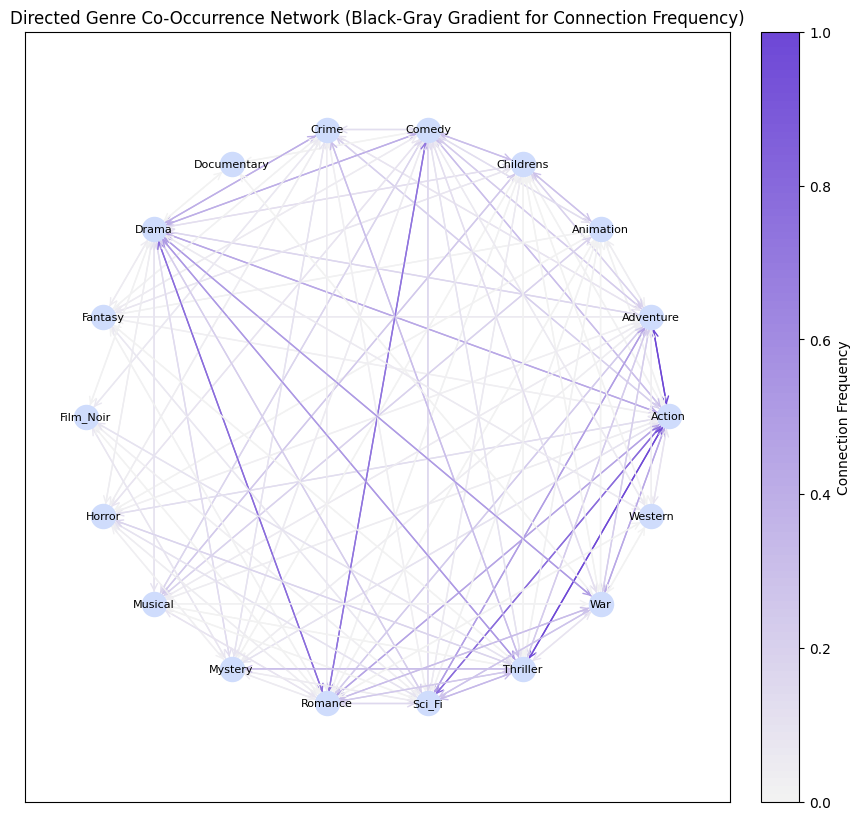

In [64]:
genre_columns = data.columns[9:27] 

# Creating a co-occurrence matrix for genres
co_occurrence_matrix = data[genre_columns].T.dot(data[genre_columns])

DG = nx.DiGraph()

# Adding nodes and directed edges to the graph
for genre in genre_columns:
    DG.add_node(genre)

for i, genre1 in enumerate(genre_columns):
    for j, genre2 in enumerate(genre_columns):
        if i != j:  # In a directed graph, we consider all pairs, not just unique combinations
            if co_occurrence_matrix.loc[genre1, genre2] > 0:
                DG.add_edge(genre1, genre2, weight=co_occurrence_matrix.loc[genre1, genre2])

weights = [DG[u][v]['weight'] for u, v in DG.edges()]
max_weight = max(weights)
min_weight = min(weights)
norm_weights = [(weight - min_weight) / (max_weight - min_weight) for weight in weights]


colors = [(0.95, 0.95, 0.95), (0.43, 0.28, 0.84)]  # R, G, B
n_bins = 100  # Discretizes the interpolation into bins
cmap_name = 'my_gray_black'
custom_cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Applying the custom colormap to normalized weights
edge_colors = custom_cmap(norm_weights)

# Creating the figure and axes
fig, ax = plt.subplots(figsize=(10, 10))
pos = nx.circular_layout(DG)

# Drawing the network graph
nodes = nx.draw_networkx_nodes(DG, pos, node_color='#CFDCFC', ax=ax)
edges = nx.draw_networkx_edges(DG, pos, edge_color=edge_colors, width=1, arrowsize=12, arrowstyle='->', ax=ax)
labels = nx.draw_networkx_labels(DG, pos, font_size=8, ax=ax)

# Adding the colorbar
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=plt.Normalize(vmin=min(norm_weights), vmax=max(norm_weights)))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.05, pad=0.04)
cbar.set_label('Connection Frequency')

ax.set_title("Directed Genre Co-Occurrence Network (Black-Gray Gradient for Connection Frequency)")
ax.axis('equal')
plt.show()